<h1 style="Comic Sans MS; text-align: center; color: #FFC300">KMeans Project: California Housing dataset</h1>
<h3 id="step1" style="font-family: Comic Sans MS; color: #68FF33">1. Problem statement and data collection</h3>
<ul style="color: pink">
    <li>We want to be able to classify houses according to their region and median income. To do this, we will use the famous California Housing dataset. It was constructed using data from the 1990 California census. It contains one row per census block group. A block group is the smallest geographic unit for which US Census data is published.</li>
    <li>Perform EDA express.</li>
    <li>Build and train a K-Means model and predict with the test set.</li>
    <li>Once the K-Means has returned a categorization (clustering) of the points for the training and test sets, study which model might be most useful and train it. Get the statistics and describe what you see. This flow is very common when we have unlabeled data: use an unsupervised learning model to label it automatically and then a supervised learning model.</li>
</ul>

In [43]:
import pandas as pd

total_data = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv')
total_data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [44]:
total_data.shape

(20640, 9)

In [45]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [46]:
# Check for missing values
total_data.isnull().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

In [47]:
# Check for duplicates
total_data.duplicated().sum()

0

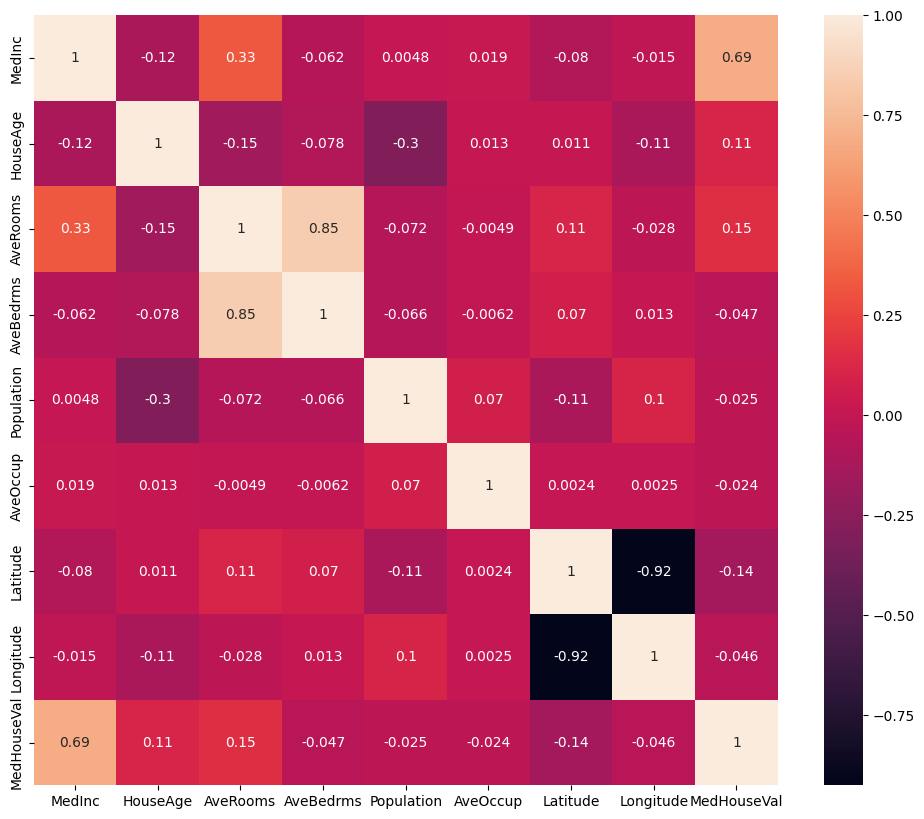

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

corr_matrix = total_data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True)
plt.show()


<Axes: xlabel='Longitude', ylabel='Latitude'>

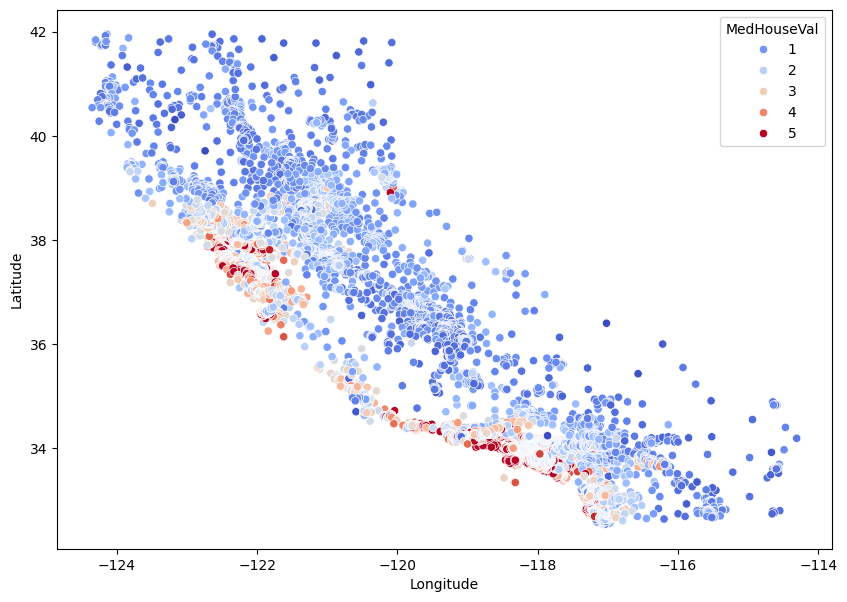

In [49]:
plt.figure(figsize=(10, 7))
sns.scatterplot(x='Longitude', y='Latitude', data=total_data, hue='MedHouseVal', palette='coolwarm')

<h3 id="step2" style="font-family: Comic Sans MS; color: #68FF33">2. Build a K-Means model</h3>
<p style="color: pink">Given we are required to classify houses according to their region and median income, we are going to remove all the variables except the 'MedInc', 'Latitude', and 'Longitude'.</p>

In [50]:
# Create a new dataset with only the features we want to use for clustering 
data = total_data[['Longitude', 'Latitude', 'MedInc']]
data.head()

,Longitude,Latitude,MedInc
0,-122.23,37.88,8.3252
1,-122.22,37.86,8.3014
2,-122.24,37.85,7.2574
3,-122.25,37.85,5.6431
4,-122.25,37.85,3.8462


In [51]:
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(data, test_size=0.2, random_state=42)
X_train.head()

,Longitude,Latitude,MedInc
14196,-117.03,32.71,3.2596
8267,-118.16,33.77,3.8125
17445,-120.48,34.66,4.1563
14265,-117.11,32.69,1.9425
2271,-119.80,36.78,3.5542


<div class="alert alert-block alert-info">
<b>Note:</b> We are required classify data into 6 clusters using K-Means model. However, I want to check if this is the optimal K. To do this I'll use the elbow method:</div>

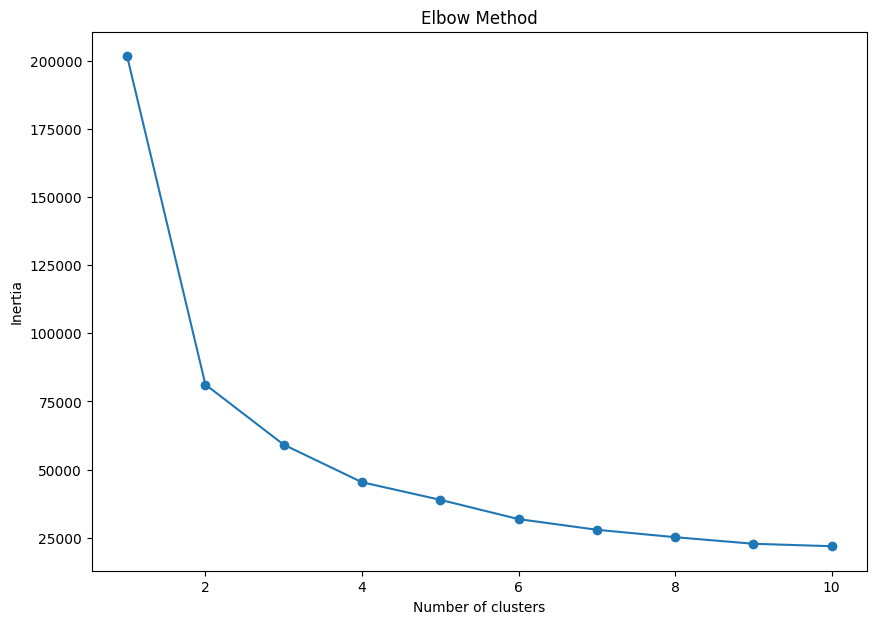

In [52]:
from sklearn.cluster import KMeans

def optimise_k_means(data, k_range):
    inertia = []
    for k in k_range:
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(data)
        inertia.append(kmeans.inertia_)
    return inertia

k_range = range(1, 11)
inertia = optimise_k_means(X_train, k_range)

plt.figure(figsize=(10, 7))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

<div class="alert alert-block alert-warning">
<b>Note:</b> From the above we can see that the elbow point is at 3, so we will try with 3 clusters after plotting and predicting the results. 
</div>

In [53]:
# Create an instance of the KMeans class
model = KMeans(n_clusters=6, random_state=42)

# Fit the model to the training data
model.fit(X_train)

KMeans(n_clusters=6, random_state=42)

In [54]:
# With the attribute labels_ we can get the labels of which cluster is associated to each point in the training data
y_train = model.labels_

# Insert the cluster to which each point belongs in the training data
X_train['Cluster'] = y_train
X_train.head()

,Longitude,Latitude,MedInc,Cluster
14196,-117.03,32.71,3.2596,3
8267,-118.16,33.77,3.8125,1
17445,-120.48,34.66,4.1563,1
14265,-117.11,32.69,1.9425,3
2271,-119.80,36.78,3.5542,5


In [55]:
# Show unique values of the cluster column
X_train['Cluster'].unique()

array([3, 1, 5, 0, 2, 4])

In [56]:
# Get the coordinates of the cluster centers
centers = model.cluster_centers_
centers

array([[-121.91549044,   37.68747253,    5.37914949],
       [-118.00301129,   33.88940929,    4.34929638],
       [-118.04112764,   33.84943618,    6.94251551],
       [-118.02425727,   34.04157015,    2.42859805],
       [-120.28422764,   35.87817073,   11.74873415],
       [-121.62299724,   38.14364263,    2.73992841]])

<b><span style="color: red">Plotting results</span></b>

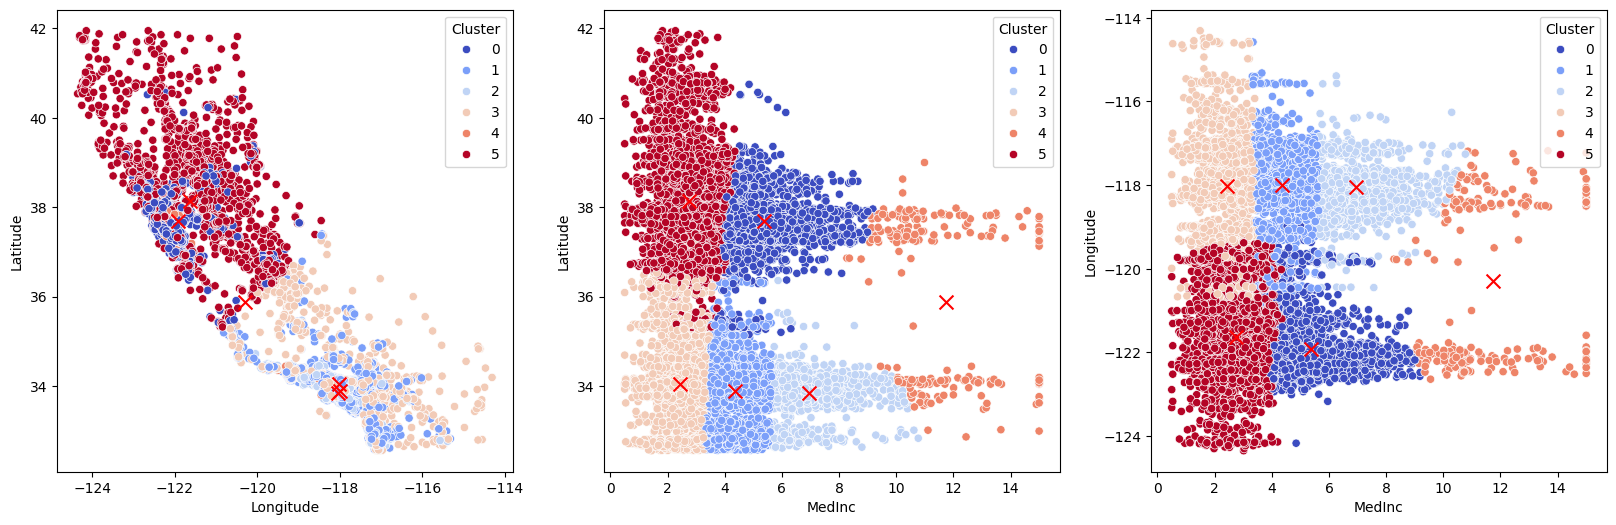

In [57]:
# Plot the results by creating 3 scatter plots: first the longitude and latitude of the training data, second the MedInc and latitude, third the MedInc and longitude
fig, ax = plt.subplots(1, 3, figsize=(20, 6))
sns.scatterplot(x='Longitude', y='Latitude', data=X_train, hue='Cluster', palette='coolwarm', ax=ax[0])
sns.scatterplot(x='MedInc', y='Latitude', data=X_train, hue='Cluster', palette='coolwarm', ax=ax[1])
sns.scatterplot(x='MedInc', y='Longitude', data=X_train, hue='Cluster', palette='coolwarm', ax=ax[2])
ax[0].scatter(centers[:, 0], centers[:, 1], color='red', marker='x', s=100)
ax[1].scatter(centers[:, 2], centers[:, 1], color='red', marker='x', s=100)
ax[2].scatter(centers[:, 2], centers[:, 0], color='red', marker='x', s=100)
plt.show()

<b><span style="color: red">Predict clusters of the test data</span></b>

In [58]:
y_test = model.predict(X_test)

X_test['Cluster'] = y_test
X_test.head()

,Longitude,Latitude,MedInc,Cluster
20046,-119.01,36.06,1.6812,3
3024,-119.46,35.14,2.5313,3
15663,-122.44,37.80,3.4801,5
20484,-118.72,34.28,5.7376,2
9814,-121.93,36.62,3.7250,5


<b><span style="color: red">Plotting test results</span></b>

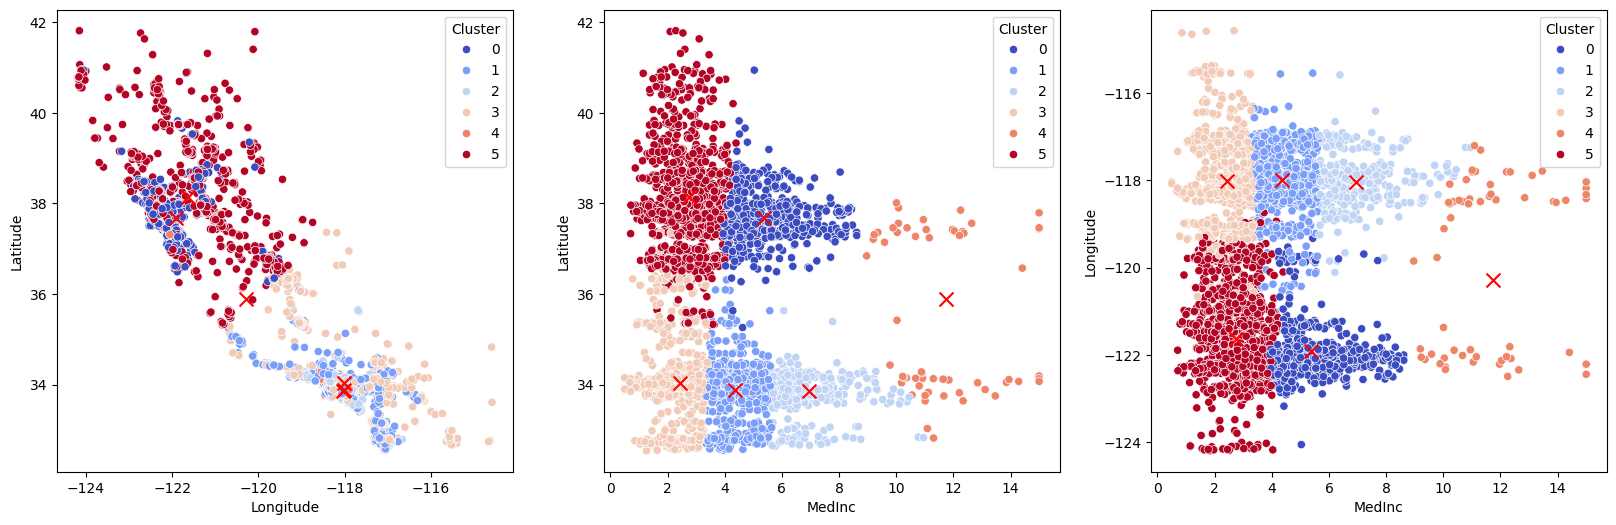

In [59]:
# Plot the results by creating 3 scatter plots: first the longitude and latitude of the test data, second the MedInc and latitude, third the MedInc and longitude
fig, ax = plt.subplots(1, 3, figsize=(20, 6))
sns.scatterplot(x='Longitude', y='Latitude', data=X_test, hue='Cluster', palette='coolwarm', ax=ax[0])
sns.scatterplot(x='MedInc', y='Latitude', data=X_test, hue='Cluster', palette='coolwarm', ax=ax[1])
sns.scatterplot(x='MedInc', y='Longitude', data=X_test, hue='Cluster', palette='coolwarm', ax=ax[2])
ax[0].scatter(centers[:, 0], centers[:, 1], color='red', marker='x', s=100)
ax[1].scatter(centers[:, 2], centers[:, 1], color='red', marker='x', s=100)
ax[2].scatter(centers[:, 2], centers[:, 0], color='red', marker='x', s=100)
plt.show()

<div class="alert alert-block alert-success">
<b>Conclusion:</b> Using 6 clusters the mode is able to capture the patterns in the data.
</div>

In [60]:
# Save the model
from pickle import dump
dump(model, open('C:/Users/Jorge Payà/Desktop/4Geeks/DSML Bootcamp/KMeans-project/models/kmeans_nclusters-6.pkl', 'wb'))
dump(model, open('C:/Users/Jorge Payà/Desktop/4Geeks/DSML Bootcamp/KMeans-project/models/kmeans_nclusters-6.sav', 'wb'))

<h3 id="step3" style="font-family: Comic Sans MS; color: #68FF33">3. K-Means model using 3 clusters</h3>

In [62]:
model_2 = KMeans(n_clusters=3, random_state=42)
model_2.fit(X_train)

KMeans(n_clusters=3, random_state=42)

In [63]:
y_train_2 = model_2.labels_
X_train['Cluster'] = y_train_2
X_train.head()

,Longitude,Latitude,MedInc,Cluster
14196,-117.03,32.71,3.2596,1
8267,-118.16,33.77,3.8125,1
17445,-120.48,34.66,4.1563,1
14265,-117.11,32.69,1.9425,1
2271,-119.80,36.78,3.5542,2


In [64]:
centers_2 = model_2.cluster_centers_
centers_2

array([[-1.21821004e+02,  3.75740861e+01,  5.87408236e+00,
         1.98352060e+00],
       [-1.17997459e+02,  3.39284369e+01,  3.86464630e+00,
         1.00000000e+00],
       [-1.21578315e+02,  3.80970361e+01,  2.72055394e+00,
         1.59299978e-02]])

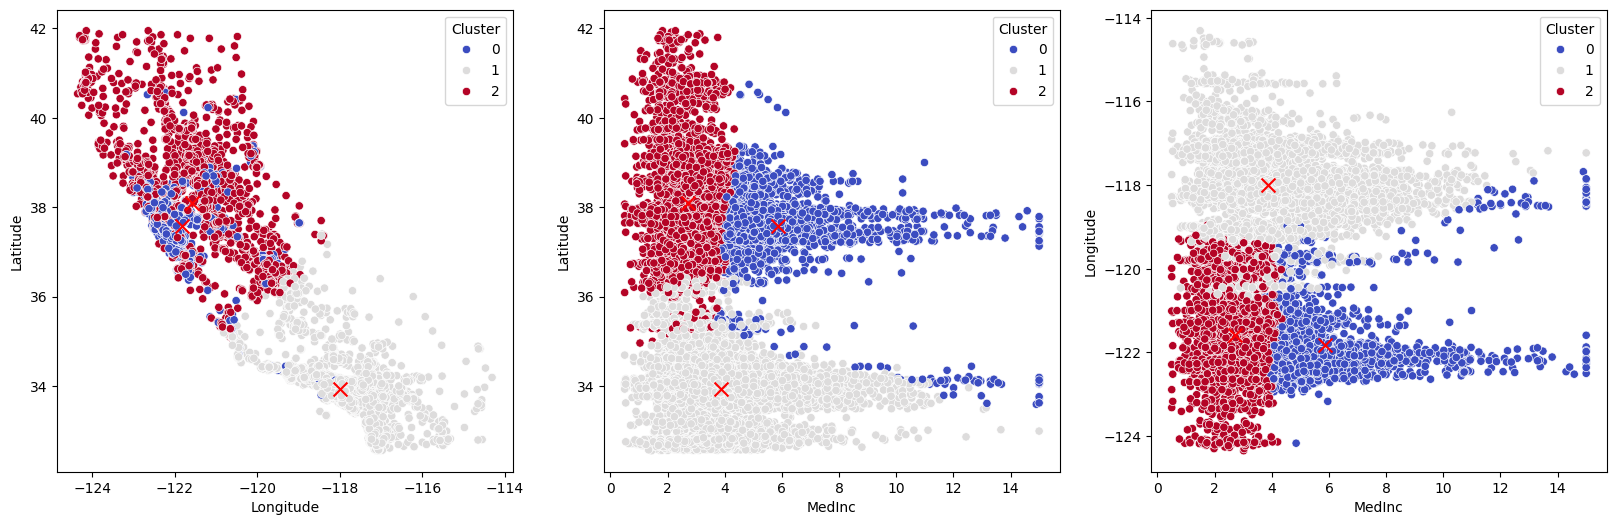

In [65]:
fig, ax = plt.subplots(1, 3, figsize=(20, 6))
sns.scatterplot(x='Longitude', y='Latitude', data=X_train, hue='Cluster', palette='coolwarm', ax=ax[0])
sns.scatterplot(x='MedInc', y='Latitude', data=X_train, hue='Cluster', palette='coolwarm', ax=ax[1])
sns.scatterplot(x='MedInc', y='Longitude', data=X_train, hue='Cluster', palette='coolwarm', ax=ax[2])
ax[0].scatter(centers_2[:, 0], centers_2[:, 1], color='red', marker='x', s=100)
ax[1].scatter(centers_2[:, 2], centers_2[:, 1], color='red', marker='x', s=100)
ax[2].scatter(centers_2[:, 2], centers_2[:, 0], color='red', marker='x', s=100)
plt.show()

In [66]:
y_test_2 = model_2.predict(X_test)
X_test['Cluster'] = y_test_2
X_test.head()

,Longitude,Latitude,MedInc,Cluster
20046,-119.01,36.06,1.6812,1
3024,-119.46,35.14,2.5313,1
15663,-122.44,37.80,3.4801,0
20484,-118.72,34.28,5.7376,1
9814,-121.93,36.62,3.7250,0


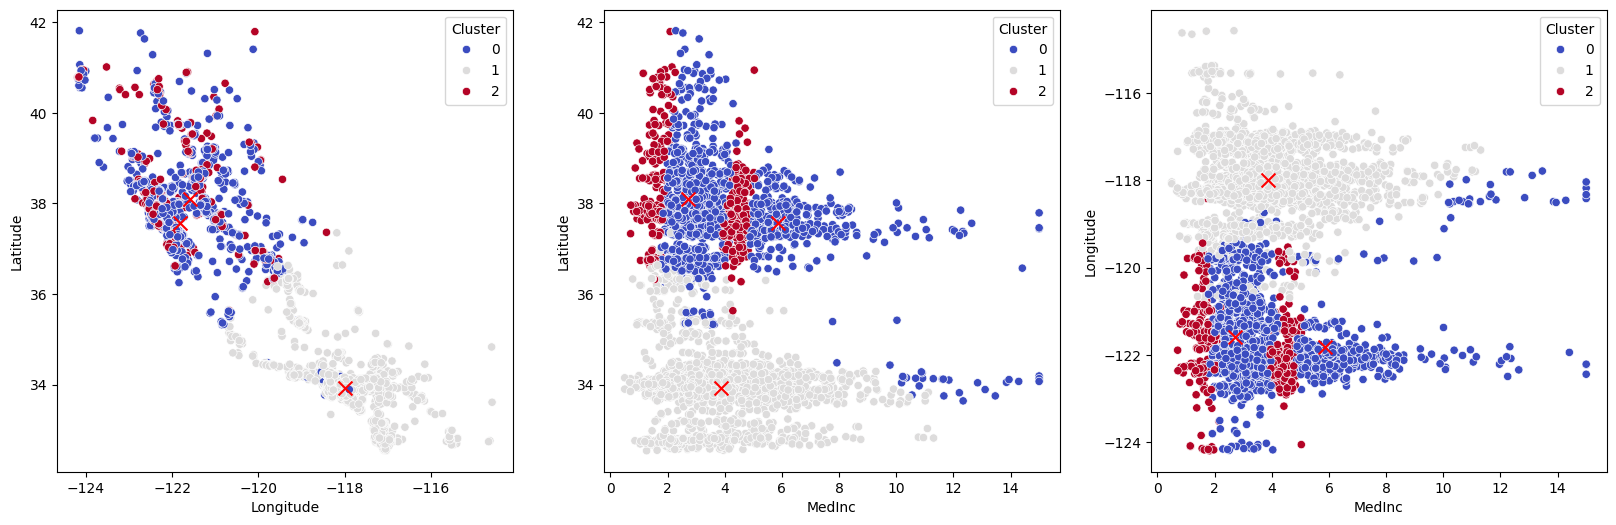

In [67]:
fig, ax = plt.subplots(1, 3, figsize=(20, 6))
sns.scatterplot(x='Longitude', y='Latitude', data=X_test, hue='Cluster', palette='coolwarm', ax=ax[0])
sns.scatterplot(x='MedInc', y='Latitude', data=X_test, hue='Cluster', palette='coolwarm', ax=ax[1])
sns.scatterplot(x='MedInc', y='Longitude', data=X_test, hue='Cluster', palette='coolwarm', ax=ax[2])
ax[0].scatter(centers_2[:, 0], centers_2[:, 1], color='red', marker='x', s=100)
ax[1].scatter(centers_2[:, 2], centers_2[:, 1], color='red', marker='x', s=100)
ax[2].scatter(centers_2[:, 2], centers_2[:, 0], color='red', marker='x', s=100)
plt.show()

<div class="alert alert-block alert-success">
<b>Conclusion:</b> By using 3 clusters instead of 6 the model is not able to differentiate the clusters as well as before. This is because the number of clusters is not enough to capture the patterns in the data.
</div>

In [68]:
dump(model_2, open('C:/Users/Jorge Payà/Desktop/4Geeks/DSML Bootcamp/KMeans-project/models/kmeans_nclusters-3.pkl', 'wb'))
dump(model_2, open('C:/Users/Jorge Payà/Desktop/4Geeks/DSML Bootcamp/KMeans-project/models/kmeans_nclusters-3.sav', 'wb'))

<h3 id="step4" style="font-family: Comic Sans MS; color: #68FF33">4. Train a supervised classification model</h3>

In [69]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [70]:
# Make predictions
y_pred = model_rf.predict(X_test)
y_pred

array([3, 3, 0, ..., 4, 0, 1])

In [71]:
# Evaluate the model
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
accuracy

0.715843023255814

In [77]:
# We will try now using a decision tree classifier instead of a random forest classifier
from sklearn.tree import DecisionTreeClassifier

model_dt = DecisionTreeClassifier(random_state=42)
model_dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [80]:
y_pred_dt = model_dt.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
accuracy_dt

0.7143895348837209

<div class="alert alert-block alert-success">
<b>Conclusion:</b> I have used 2 supervised classification models but the results are not good. I would need to improve the clustering exercise prior to use a supervided model.
</div>